In [1]:
import numpy as np
from nptyping import NDArray
import random
import numpy.linalg as LA
import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple, Optional, Any, Callable
from PIL import Image
import os
import json

In [2]:
from utils import load_image_to_arr, display_rgb, SVD2D
import dim_reduction
from spectral_data import ImageSpectralData
dim_reduction.init_basis_cache()
import cityscapes_helper
from dataset_creation import (
    MultiScaleImageSampler, 
    ImageChunkSummarizerOptions, 
    MultiScaleImageEncoder, 
    MultiScaleImageDecoder, 
    ImageAtScale, 
    CityscapesDatasetFactory, 
    CityScapesDataset
)
from cityscapes_helper import format_semantic_composition

In [3]:
# Ben Desptop
#cityscapes_helper.set_visual_data_zip_path("C:\\Users\\Ben\\Downloads\\leftImg8bit_trainvaltest.zip")
#cityscapes_helper.set_semantic_data_zip_path("C:\\Users\\Ben\\Downloads\\gtFine_trainvaltest.zip")

#Ben Laptop (via WSL)
cityscapes_helper.set_visual_data_zip_path("/mnt/c/Users/benki/Downloads/leftImg8bit_trainvaltest.zip")
cityscapes_helper.set_semantic_data_zip_path("/mnt/c/Users/benki/Downloads/gtFine_trainvaltest.zip")

cityscapes_helper.initialize_tool()

0.npy
1.npy
2.npy
3.npy
4.npy
5.npy
6.npy
(30000, 30)
(30000, 701)


/home/benthehuman/school/vision/UW-Vision-Segmentation/dataset_creation.py:573: RuntimeWarning: invalid value encountered in true_divide
  feature_01 = (features - feature_min) / feature_range


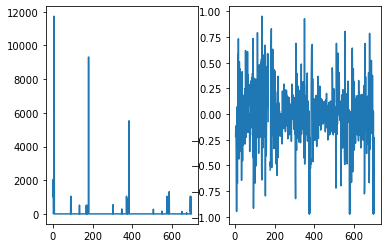

In [4]:
dataset = CityScapesDataset("full_dataset_v1_30000")
dataset.load()
normalized_features = dataset.get_normalized_features()
print(dataset.labels.shape)
print(dataset.features.shape)
sample_feature = dataset.features[0]
sample_feature_normalized = normalized_features[0]
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(sample_feature)
ax2.plot(sample_feature_normalized)

9879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0.]
tubingen_000092


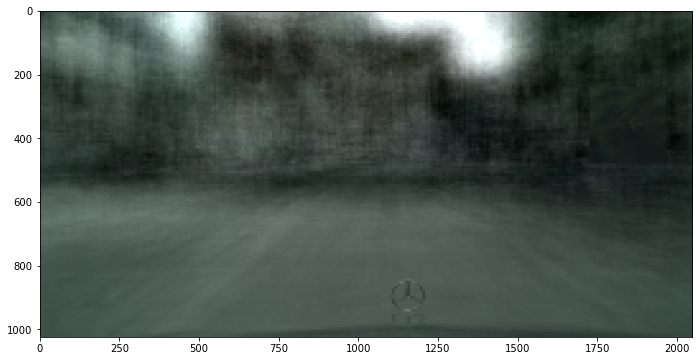

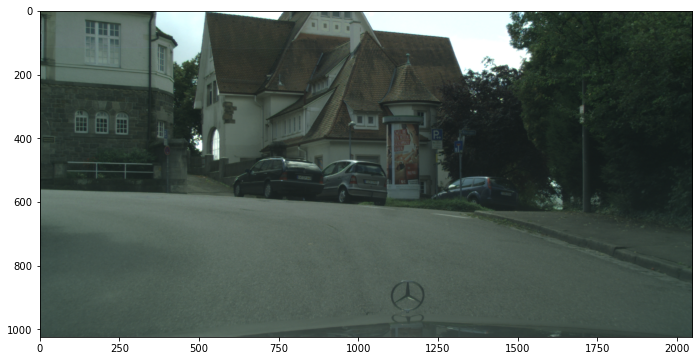

In [15]:
i = random.randint(0, dataset.features.shape[0])
print(i)
decoded_feature = dataset.get_decoded_feature(i)
decoded_feature_original_image = dataset.get_feature_original_image(i)
print(np.round(dataset.labels[i], 3))
print(dataset.sceneIds[i])
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.imshow(decoded_feature)

fig, ax2 = plt.subplots(figsize=(15, 6))
ax2.imshow(decoded_feature_original_image)